Nama : Septi Intan Amalia

Nim : H071191022

[Soal Modern RNN](https://d2l.ai/chapter_recurrent-modern/index.html)

RNN mampu mengatasi data sequence dengan mengingat informasi atau hidden state dari cell RNN sebelumnya untuk diaplikasikan ke cell yang sekarang. Namun untuk kasus di mana sequence nya panjang atau besar, RNN kesulitan untuk menyimpan informasi dari cell yang jauh di belakang sehingga tidak bisa mengatasi kalimat yang memiliki kata dengan ketergantungan jangka panjang. Singkatnya RNN mempunyai daya ingat yang pendek. 

Saat RNN tetap mencoba untuk mengatasi sequence yang panjang, akan terjadi vanishing gradient problem, atau gradien dari loss function mendekati 0 saat proses back propagation terjadi, dan menyebabkan proses pembaruan weight terlalu kecil. 

Pada beberapa kasus RNN juga bisa menyebabkan exploding gradient problem, yaitu saat gradien dari loss function terlalu tinggi atau mendekati infinite. 

Untuk mengatasi masalah-masalah tersebut, diciptakanlah LSTM dan GRU.

# **Long Short-Term Memory (LSTM)**

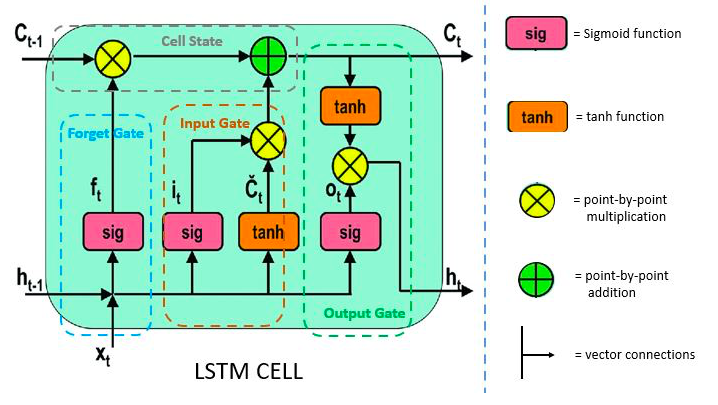

LSTM merupakan salah satu arsitektur RNN yang dimodifikasi dengan menambahkan konsep cell state dan mekanisme gating. Cell state berbeda dari hidden state, perbedaan utama dari cell state dan hidden state, yaitu cell state mengenkode/mengurus semua data yang telah diproses sebelumnya, sementara hidden state hanya berfungsi sebagai penyambung dengan data pada cell sebelumnya. 

Gate merupakan FCN dengan aktivasi sigmoid, yang keluarannya mempengaruhi atau dipengaruhi oleh cell state. Terdapat beberapa komponen pada satu cell LSTM:

* Cell state

*   Input data ke-t.
* Hidden state dari cell LSTM sebelumnya.

* Forget gate: Gate yang menentukan informasi mana yang dilupakan atau disimpan pada cell state.

* Input gate: Gate yang mengupdate cell state.

* Output: Gate yang menentukan hidden state selanjutnya.

**1. Cell State**

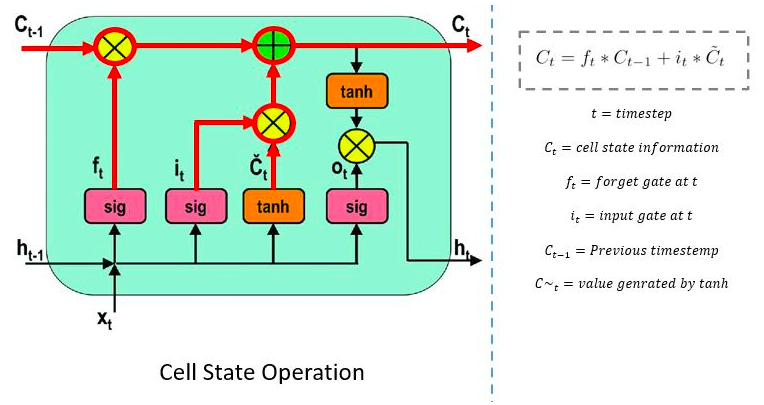

Pengertian cell state telah dijelaskan sebelumnya, namun apa sebenarnya cell state? Cell state berbentuk vektor/matriks/tensor. Cell state (beserta forget gate) merupakan variabel utama yang mengatasi masalah vanishing gradient problem, mengapa? karena cell state hanya menyimpan data yang diputuskan untuk disimpa, dan melupakan data/state yang tidak perlu. Nilai initial cell state normalnya adalah 0, random, atau dalam beberapa kasus merupakan nilai yang telah dilatih sebelumnya. 

Berikut proses yang sebenarnya terjadi dalam cell LSTM:


**2. Forget Gate**

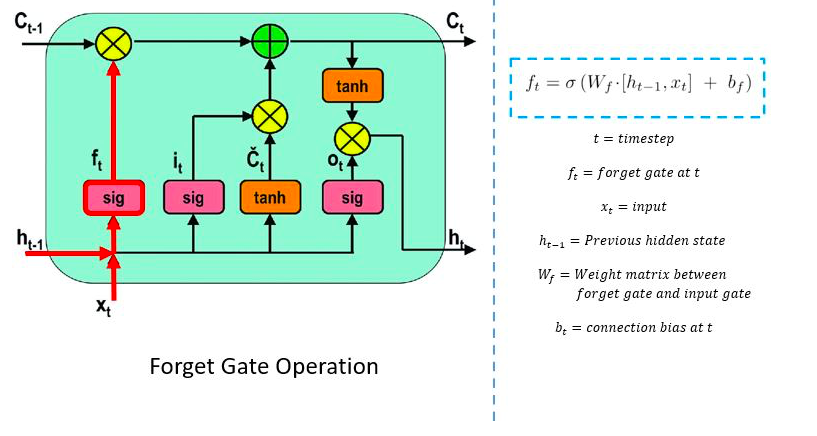

Proses pertama terjadi di forget gate, di mana akan ditentukan informasi mana yang perlu diperhatikan atau dilupakan. Prosesnya yaitu:

Melakukan concantenate dari hidden state sebelumnya dengan input saat ini.
Memasukkan hasil concat tersebut dalam FCN (feed forward) dengan fungsi aktivasi sigmoid. Output dari FCN ini mempunyai dimensi yang sama dengan cell state.
Melakukan perkalian titik-ke-titik pada matriks cell state dengn output FCN tersebut.
Jika suatu titik pada matriks adalah 1 atau mendekati 1, maka artinya informasi dari cell state pada indeks yang sama dengan titik tersebut tetap disimpan, begitu pula sebaliknya, jika 0 atau mendekati 0 maka akan dilupakan. Sekarang cell state telah dimodifikasi.

**3.Input Gate** 

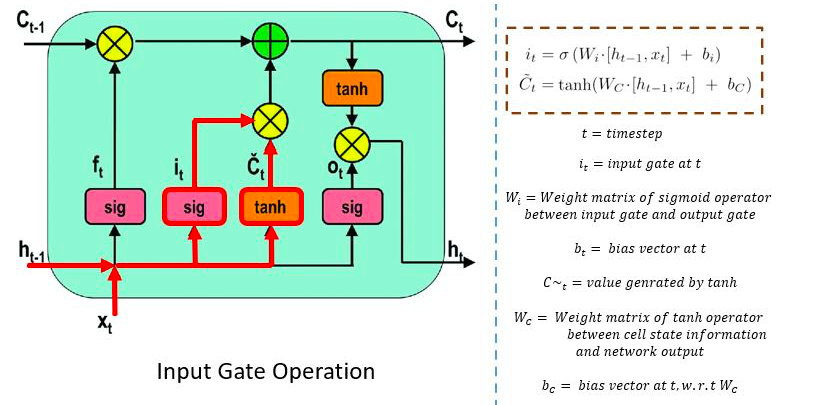

Pada input gate, akan menentukan jika cell diupdate atau tidak.

Pertama-tama, sama seperti pada forget gate, dilakukan concantenate dari hidden state sebelumnya dengan input saat ini.
Memasukkan hasil concat tersebut dalam FCN (feed forward) dengan fungsi aktivasi sigmoid.
Hasil concat yang sama juga dimasukkan pada FCN ke-2 yang memiliki fungsi aktivasi tanh. Ini memungkinkan matriks memiliki nilai kisaran -1 sampai 1.
Dilakukan perkalian titik-ke-titik pada FCN ke-1 dan ke-2.
Output dari perkalian tersebut ditambahkan pada matriks cell state dengan metode penambahan titik-ke-titik.
Cell state telah terupdate.

**4. Output Gate**

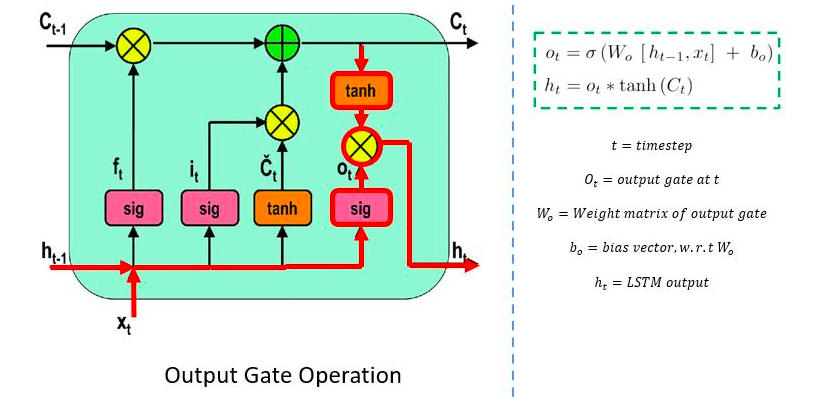

Pada input gate, akan menentukan jika cell diupdate atau tidak.

Pertama-tama, sama seperti pada forget gate, dilakukan concantenate dari hidden state sebelumnya dengan input saat ini.
Memasukkan hasil concat tersebut dalam FCN (feed forward) dengan fungsi aktivasi sigmoid.
Hasil concat yang sama juga dimasukkan pada FCN ke-2 yang memiliki fungsi aktivasi tanh. Ini memungkinkan matriks memiliki nilai kisaran -1 sampai 1.
Dilakukan perkalian titik-ke-titik pada FCN ke-1 dan ke-2.
Output dari perkalian tersebut ditambahkan pada matriks cell state dengan metode penambahan titik-ke-titik.
Cell state telah terupdate.

**Implementasi Code**

In [1]:
import tensorflow as tf
from tensorflow import keras

mnist= keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

x_train= x_train/255
x_test= x_test/255

model= keras.models.Sequential([
  keras.layers.LSTM(64, input_shape=(x_train.shape[1:]), activation='relu', return_sequences= True),
  keras.layers.LSTM(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1875/1875 [==============================] - 47s 23ms/step - loss: 0.4993 - accuracy: 0.8370
Epoch 2/3
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1290 - accuracy: 0.9604
Epoch 3/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0911 - accuracy: 0.9726


In [2]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0604 - accuracy: 0.9810


[0.06035838648676872, 0.9810000061988831]

5. Gate Recurrent Unit (GUI)

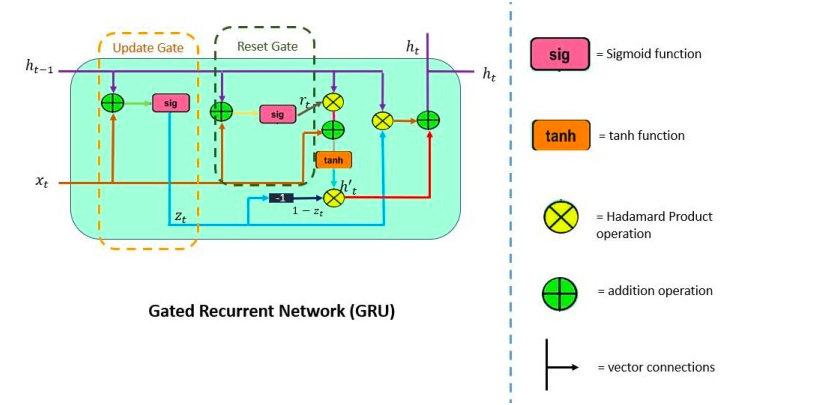

GRU merupakan arsitektur RNN yang juga menggunakan mekanisme gating. GRU diciptakan dengan memodifikasi LSTM sehingga lebih ringkas dan cepat. Berikut perbedaan utama antara LSTM dan GRU:

GRU tidak memiliki cell state
Memori jangka panjang disimpan pada hidden state
Hanya memiliki 2 gate (reset dan forget gate)
GRU memiliki parameter yang relatif lebih sedikit daripada LSTM yang membuatnya lebih cepat
Proses feed-forward GRU juga hampir sama dengan LSTM. Berikut penjelasan gate pada GRU:

**1. Update Gate**

Update gate merupakan gabungan dari forget gate dan input gate. Gate ini memutuskan informasi mana yang akan diabaikan dan informasi mana yang akan ditambahkan.

**2. Reset Gate**

Gate ini menentukan seberapa banyak informasi pada hidden state yang di-reset/dilupakan jika tidak diperlukan lagi, untuk menghindari gradient explosion.

**Implementasi Kode**

In [3]:
import tensorflow as tf
from tensorflow import keras

mnist= keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()

x_train= x_train/255
x_test= x_test/255

model= keras.models.Sequential([
  keras.layers.GRU(64, input_shape=(x_train.shape[1:]), activation='relu', return_sequences= True),
  keras.layers.GRU(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3954 - accuracy: 0.8674
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1044 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0727 - accuracy: 0.9780


In [4]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.0538 - accuracy: 0.9828


[0.05377884954214096, 0.9828000068664551]